# Image Processing Operations

In [1]:
# import the necessary packages
from matplotlib import pyplot as plt
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import glob
import cv2

In [2]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

##  1 -  OpenCV Morphological Operations


[Reference](https://pyimagesearch.com/2021/04/28/opencv-morphological-operations/?_ga=2.110044930.608670271.1656952021-258974203.1656952021)

The morphological operations we’ll be covering include:
- Erosion
- Dilation
- Opening
- Closing
- Morphological gradient
- Black hat
- Top hat (also called “White hat”)

-> These image processing operations are applied to grayscale or binary images and are used for preprocessing for OCR algorithms, detecting barcodes, detecting license plates, and more.

-> And sometimes a clever use of morphological operations can allow you to avoid more complicated (and computationally expensive) machine learning and deep learning algorithms.

-> Morphological operations “probe” an image with a structuring element. This **structuring element** defines the neighborhood to be examined around each pixel. And based on the given operation and the size of the structuring element we are able to adjust our output image.

-> just like in image kernels, the structuring element slides from left-to-right and top-to-bottom for each pixel in the image. Also just like kernels, structuring elements can be of arbitrary neighborhood sizes.

In [3]:
args = {
    "image": "images/pyimagesearch_logo.png"
}

### Erosion 
- Just like water rushing along a river bank erodes the soil, an erosion in an image “erodes” the foreground object and makes it smaller. 
- Simply put, pixels near the boundary of an object in an image will be discarded, “eroding” it away.
- Erosion works by defining a structuring element and then sliding this structuring element from left-to-right and top-to-bottom across the input image.
- A foreground pixel in the input image will be kept only if all pixels inside the structuring element are > 0. Otherwise, the pixels are set to 0 (i.e., background).
- Erosion is useful for removing small blobs in an image or disconnecting two connected objects.

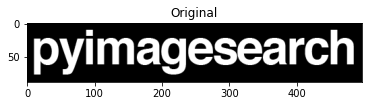

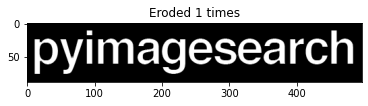

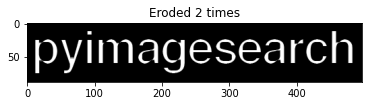

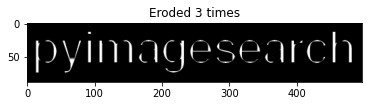

In [4]:
# load the image, convert it to grayscale, and display it to our screen
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Original", image)

# apply a series of erosions
for i in range(0, 3):
    eroded = cv2.erode(gray.copy(), None, iterations=i + 1)
    plt_imshow("Eroded {} times".format(i + 1), eroded)

### Dilation
- The opposite of an erosion is a dilation. Just like an erosion will eat away at the foreground pixels, a dilation will grow the foreground pixels.
- Dilations increase the size of foreground objects and are especially useful for joining broken parts of an image together.
- Dilations, just as an erosion, also utilize structuring elements — a center pixel p of the structuring element is set to white if ANY pixel in the structuring element is > 0.

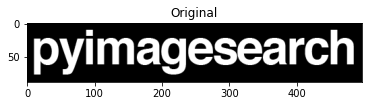

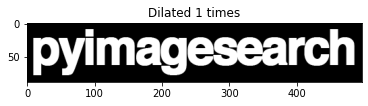

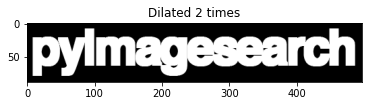

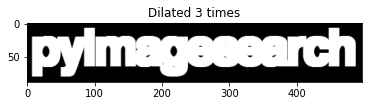

In [5]:
# display the original image
plt_imshow("Original", image)

# apply a series of dilations
for i in range(0, 3):
    dilated = cv2.dilate(gray.copy(), None, iterations=i + 1)
    plt_imshow("Dilated {} times".format(i + 1), dilated)

### Opening
- An opening is an erosion followed by a dilation.
- Performing an opening operation allows us to remove small blobs from an image: first an erosion is applied to remove the small blobs, then a dilation is applied to regrow the size of the original object.

In [6]:
args = {
    "image": "images/pyimagesearch_logo_noise.png"
}

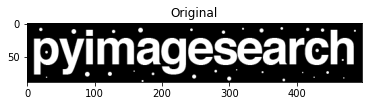

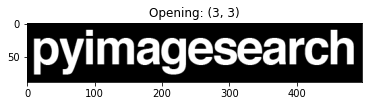

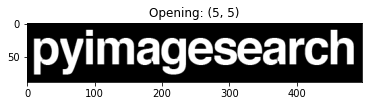

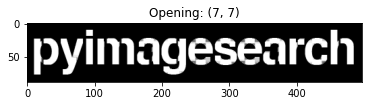

In [7]:
# close all windows to cleanup the screen, then initialize a list of
# of kernels sizes that will be applied to the image
image = cv2.imread(args["image"])
plt_imshow("Original", image)
kernelSizes = [(3, 3), (5, 5), (7, 7)]

# loop over the kernels sizes
for kernelSize in kernelSizes:
    # construct a rectangular kernel from the current size and then
    # apply an "opening" operation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
    plt_imshow("Opening: ({}, {})".format(
        kernelSize[0], kernelSize[1]), opening)

### Closing
- The exact opposite to an opening would be a closing. A closing is a dilation followed by an erosion.
- As the name suggests, a closing is used to close holes inside of objects or for connecting components together.

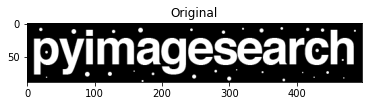

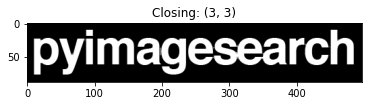

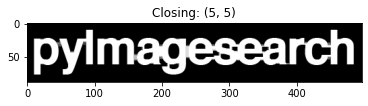

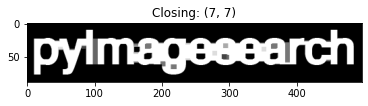

In [8]:
# display the original image
plt_imshow("Original", image)

# loop over the kernels sizes again
for kernelSize in kernelSizes:
    # construct a rectangular kernel form the current size, but this
    # time apply a "closing" operation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    plt_imshow("Closing: ({}, {})".format(
        kernelSize[0], kernelSize[1]), closing)

### Morphological gradient
- A morphological gradient is the difference between a dilation and erosion. It is useful for determining the outline of a particular object of an image.

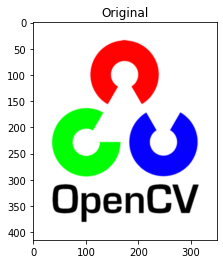

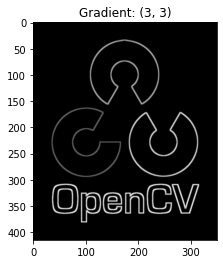

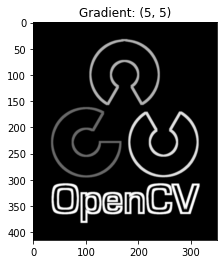

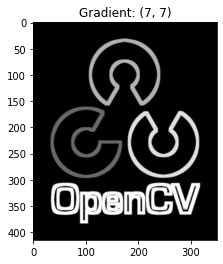

In [9]:
# display the original image
#image = cv2.imread(args["image"])
image = cv2.imread("images/opencv_logo.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Original", image)

# loop over the kernels a final time
for kernelSize in kernelSizes:
    # construct a rectangular kernel and apply a "morphological
    # gradient" operation to the image
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
    plt_imshow("Gradient: ({}, {})".format(
        kernelSize[0], kernelSize[1]), gradient)

### Morphological hats

#### Top hat/white hat and black hat
- A top hat (also known as a white hat) morphological operation is the difference between the original (grayscale/single channel) input image and the opening.
- A top hat operation is used to reveal bright regions of an image on dark backgrounds.
- A blackhat operation which enables us to find dark regions on a light background.
- Both the top hat/white hat and the black hat operators are more suited for grayscale images rather than binary ones.


In [10]:
args = {
    "image": "images/car.png"
}

In [11]:
# load the image and convert it to grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# construct a rectangular kernel (13x5) and apply a blackhat
# operation which enables us to find dark regions on a light
# background
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)

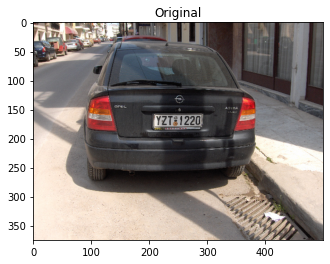

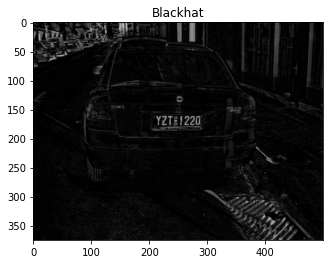

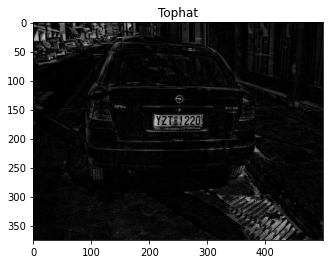

In [12]:
# similarly, a tophat (also called a "whitehat") operation will
# enable us to find light regions on a dark background
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)

# show the output images
plt_imshow("Original", image)
plt_imshow("Blackhat", blackhat)
plt_imshow("Tophat", tophat)

##  2 - Smoothing and Blurring


[Reference](https://pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/?_ga=2.151455550.608670271.1656952021-258974203.1656952021)

- as the size of the kernel increases, so will the amount in which the image is blurred.
The following blurring operations
- Simple blurring (cv2.blur)
   - An average filter does exactly what you think it might do — takes an area of pixels surrounding a central pixel, averages all these pixels together, and replaces the central pixel with the average.
   - By taking the average of the region surrounding a pixel, we are smoothing it and replacing it with the value of its local neighborhood. This allows us to reduce noise and the level of detail, simply by relying on the average.
- Weighted Gaussian blurring (cv2.GaussianBlur)
   - Gaussian blurring is similar to average blurring, but instead of using a simple mean, we are now using a weighted mean, where neighborhood pixels that are closer to the central pixel contribute more “weight” to the average.
- Median filtering (cv2.medianBlur)
   - The median blur method has been most effective when removing salt-and-pepper noise.
- Bilateral blurring (cv2.bilateralFilter)

-> Sharper regions in the image lose their detail. The goal here is to use a low-pass filter to reduce the amount of noise and detail in an image.
-> Practically, this means that each pixel in the image is mixed in with its surrounding pixel intensities. This “mixture” of pixels in a neighborhood becomes our blurred pixel.
-> In fact, smoothing and blurring is one of the most common preprocessing steps in computer vision and image processing.
-> By smoothing an image prior to applying techniques such as edge detection or thresholding we are able to reduce the amount of high-frequency content, such as noise and edges (i.e., the “detail” of an image).

In [13]:
args = {
    "image": "images/neeraj.jpg"
}

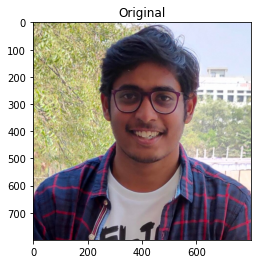

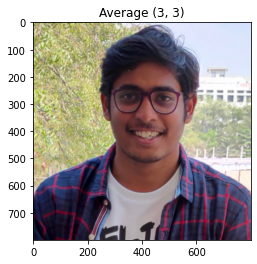

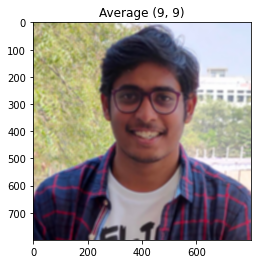

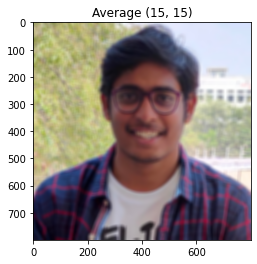

In [14]:
# load the image, display it to our screen, and initialize a list of
# kernel sizes (so we can evaluate the relationship between kernel
# size and amount of blurring)
image = cv2.imread(args["image"])
plt_imshow("Original", image)
kernelSizes = [(3, 3), (9, 9), (15, 15)]

# loop over the kernel sizes
for (kX, kY) in kernelSizes:
    # apply an "average" blur to the image using the current kernel
    # size
    blurred = cv2.blur(image, (kX, kY))
    plt_imshow("Average ({}, {})".format(kX, kY), blurred)

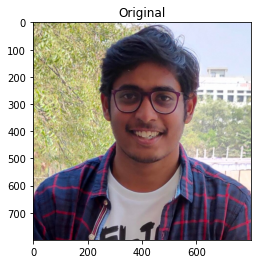

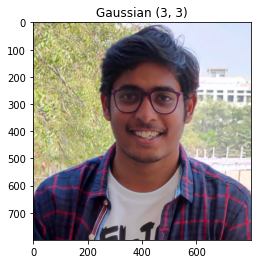

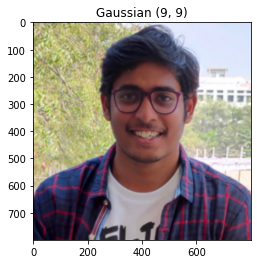

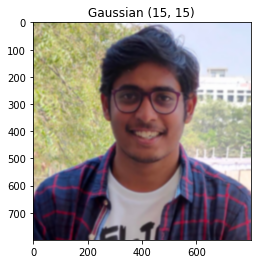

In [15]:
# display the original image
plt_imshow("Original", image)

# loop over the kernel sizes again
for (kX, kY) in kernelSizes:
    # apply a "Gaussian" blur to the image
    blurred = cv2.GaussianBlur(image, (kX, kY), 0)
    plt_imshow("Gaussian ({}, {})".format(kX, kY), blurred)

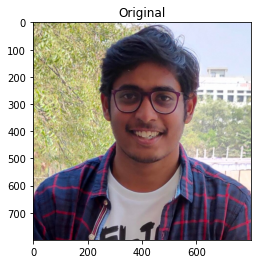

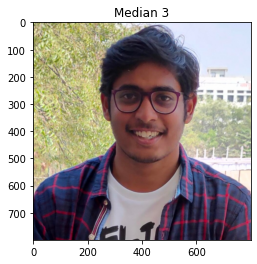

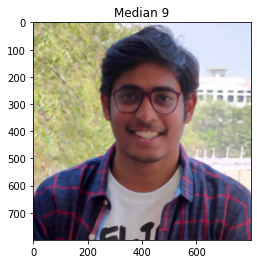

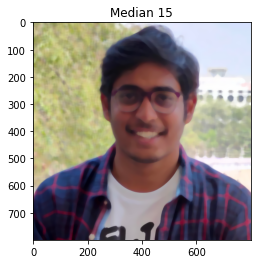

In [16]:
# display the original image
plt_imshow("Original", image)

# loop over the kernel sizes a final time
for k in (3, 9, 15):
    # apply a "median" blur to the image
    blurred = cv2.medianBlur(image, k)
    plt_imshow("Median {}".format(k), blurred)

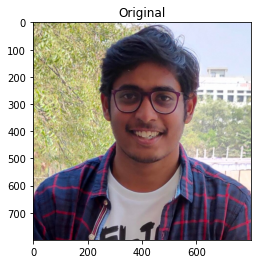

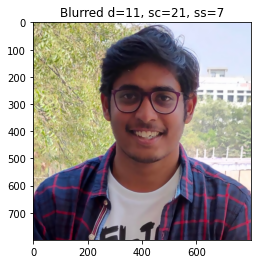

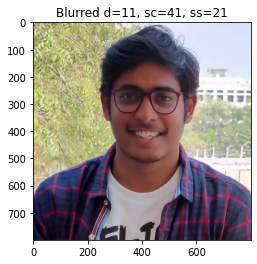

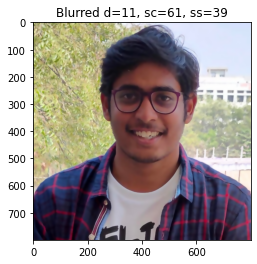

In [17]:
# load the image, display it to our screen, and construct a list of
# bilateral filtering parameters that we are going to explore
image = cv2.imread(args["image"])
plt_imshow("Original", image)
params = [(11, 21, 7), (11, 41, 21), (11, 61, 39)]

# loop over the diameter, sigma color, and sigma space
for (diameter, sigmaColor, sigmaSpace) in params:
    # apply bilateral filtering to the image using the current set of
    # parameters
    blurred = cv2.bilateralFilter(image, diameter, sigmaColor, sigmaSpace)

    # show the output image and associated parameters
    title = "Blurred d={}, sc={}, ss={}".format(
        diameter, sigmaColor, sigmaSpace)
    plt_imshow(title, blurred)

##  3 - OpenCV Color Spaces


[Reference](https://pyimagesearch.com/2021/04/28/opencv-color-spaces-cv2-cvtcolor/?_ga=2.151455550.608670271.1656952021-258974203.1656952021)

- lighting can mean the difference between success and failure of your computer vision algorithm.
- Your lighting conditions should have three primary goals
   - High Contrast
   - Generalizable
   - Stable
- A color space is just a specific organization of colors that allow us to consistently represent and reproduce colors.
- Color Models:
   - RGB: a color in the RGB color model, all we need to do is define the amount of Red, Green, and Blue contained in a single pixel. Each Red, Green, and Blue channel can have values defined in the range [0, 255] (for a total of 256 “shades”), where 0 indicates no representation and 255 demonstrates full representation.
   - HSV: 
     - The HSV color space transforms the RGB color space, remodeling it as a cylinder rather than a cube.
     - OpenCV, images are represented as 8-bit unsigned integer arrays. Thus, the Hue value is defined as the range [0, 179] (for a total of 180 possible values, since [0, 359] is not possible for an 8-bit unsigned array) — the Hue is actually a degree (\theta) on the HSV color cylinder. And both saturation and value are defined on the range [0, 255]. 
     - The **value** controls the actual lightness of our color, while both **Hue** and **Saturation** define the actual color and shade.
     - The HSV color space is used heavily in computer vision applications — especially if we are interested in tracking the color of some object in an image. It’s far, far easier to define a valid color range using HSV than it is RGB
       - Hue: Which “pure” color we are examining. For example, all shadows and tones of the color “red” will have the same Hue.
       - Saturation: How “white” the color is. A fully saturated color would be “pure,” as in “pure red.” And a color with zero saturation would be pure white.
       - Value: The Value allows us to control the lightness of our color. A Value of zero would indicate pure black, whereas increasing the value would produce lighter colors.
   - L * a * b *:
     -  The HSV color space is more intuitive but does not do the best job in representing how humans see and interpret colors in images.
     - L* a *b* color space goal is to mimic the methodology in which humans see and interpret color.
     - The Euclidean distance between two arbitrary colors in the L* a * b* color space has actual perceptual meaning.
        - L-channel: The “lightness” of the pixel. This value goes up and down the vertical axis, white to black, with neutral grays at the center of the axis.
        - a-channel: Originates from the center of the L-channel and defines pure green on one end of the spectrum and pure red on the other.
        - b-channel: Also originates from the center of the L-channel, but is perpendicular to the a-channel. The b-channel defines pure blue at one of the spectrum and pure yellow at the other.

In [18]:
args = {
    "image": "images/neeraj.jpg",
}

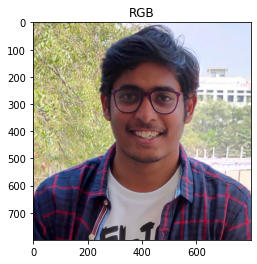

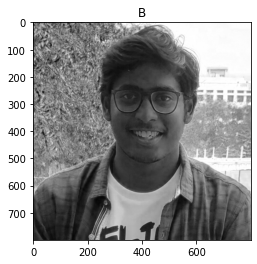

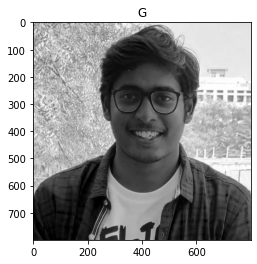

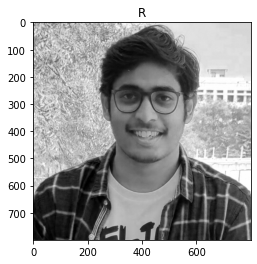

In [19]:
# load the original image and show it
image = cv2.imread(args["image"])
plt_imshow("RGB", image)

# loop over each of the individual channels and display them
for (name, chan) in zip(("B", "G", "R"), cv2.split(image)):
    plt_imshow(name, chan)

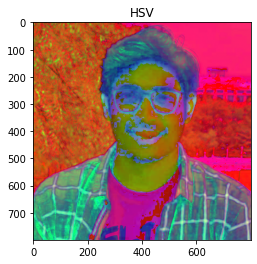

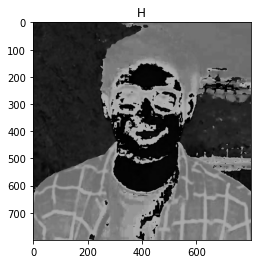

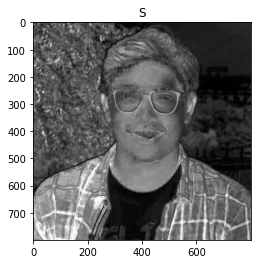

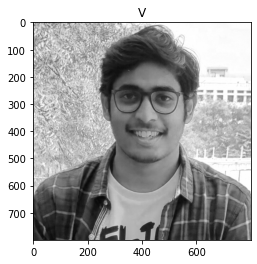

In [20]:
# convert the image to the HSV color space and show it
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt_imshow("HSV", hsv)

# loop over each of the invidiaul channels and display them
for (name, chan) in zip(("H", "S", "V"), cv2.split(hsv)):
    plt_imshow(name, chan)

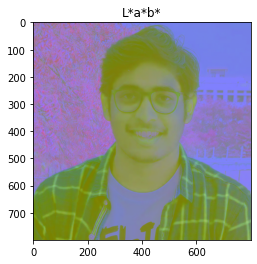

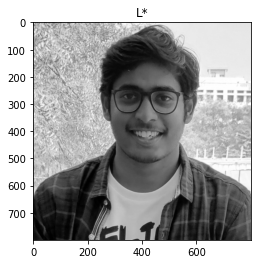

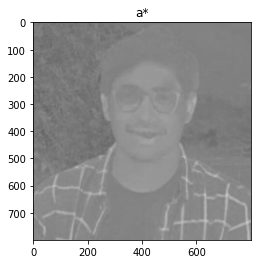

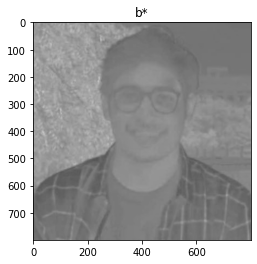

In [21]:
# convert the image to the L*a*b* color space and show it
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
plt_imshow("L*a*b*", lab)

# loop over each of the invidiaul channels and display them 
for (name, chan) in zip(("L*", "a*", "b*"), cv2.split(lab)):
    plt_imshow(name, chan)

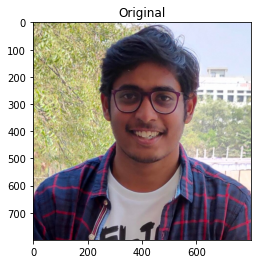

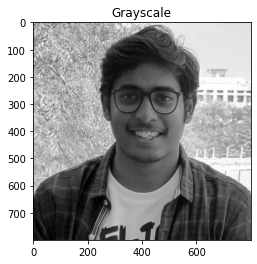

In [22]:
# show the original and grayscale versions of the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Original", image)
plt_imshow("Grayscale", gray)

##  4 - Thresholding

[Reference](https://pyimagesearch.com/2021/04/28/opencv-thresholding-cv2-threshold/?_ga=2.72360852.608670271.1656952021-258974203.1656952021 )
[Reference](https://pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/?_ga=2.72360852.608670271.1656952021-258974203.1656952021 )

- Thresholding is one of the most common (and basic) segmentation techniques in computer vision and it allows us to separate the foreground (i.e., the objects that we are interested in) from the background of the image.
- Thresholding is the binarization of an image. In general, we seek to convert a grayscale image to a binary image, where the pixels are either 0 or 255.
- A simple thresholding example would be selecting a threshold value T, and then setting all pixel intensities less than T to 0, and all pixel values greater than T to 255. In this way, we are able to create a binary representation of the image.
- Thresholding comes in three forms:
    - We have simple thresholding where we manually supply parameters to segment the image — this works extremely well in controlled lighting conditions where we can ensure high contrast between the foreground and background of the image.
    - We also have methods such as Otsu’s thresholding that attempt to be more dynamic and automatically compute the optimal threshold value based on the input image.
    - we have adaptive thresholding which, instead of trying to threshold an image globally using a single value, instead breaks the image down into smaller pieces, and thresholds each of these pieces separately and individually.

In [23]:
args = {
    "image": "images/opencv_logo.png"
}

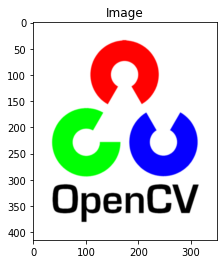

In [24]:
# load the image and display it
image = cv2.imread(args["image"])
plt_imshow("Image", image)

In [25]:
# convert the image to grayscale and blur it slightly
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

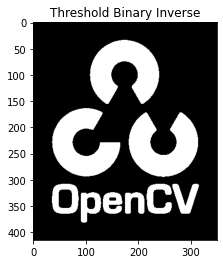

In [26]:
# apply basic thresholding -- the first parameter is the image
# we want to threshold, the second value is is our threshold
# check; if a pixel value is greater than our threshold (in this
# case, 200), we set it to be *black, otherwise it is *white*
(T, threshInv) = cv2.threshold(blurred, 200, 255,
    cv2.THRESH_BINARY_INV)
plt_imshow("Threshold Binary Inverse", threshInv)

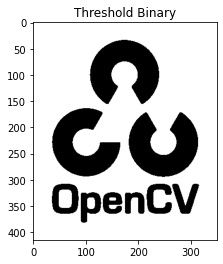

In [27]:
# using normal thresholding (rather than inverse thresholding)
(T, thresh) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
plt_imshow("Threshold Binary", thresh)

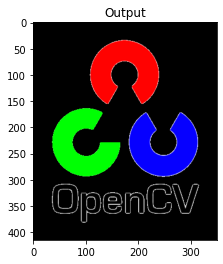

In [28]:
# visualize only the masked regions in the image
masked = cv2.bitwise_and(image, image, mask=threshInv)
plt_imshow("Output", masked)

#### Otsu:
   - Otsu’s method assumes that our image contains two classes of pixels: the background and the foreground.
   - Otsu’s method makes the assumption that the grayscale histogram of our pixel intensities of our image is bi-modal, which simply means that the histogram is two peaks.
   - The value of T returned by Otsu’s method may not be optimal in visual investigation of our image — we can clearly see some gaps and holes in the coins of the thresholded image. But this value is optimal in the sense that it does the best possible job to split the foreground and the background assuming a bi-modal distribution of grayscale pixel values.

Drawbacks:
   - The first is that Otsu’s method assumes a bi-modal distribution of the grayscale pixel intensities of our input image. If this is not the case, then Otsu’s method can return sub-par results.
   - Secondly, Otsu’s method is a global thresholding method. In situations where lighting conditions are semi-stable and the objects we want to segment have sufficient contrast from the background, we might be able to get away with Otsu’s method.

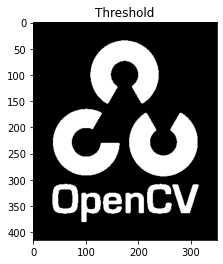

[INFO] otsu's thresholding value: 166.0


In [29]:
# apply Otsu's automatic thresholding which automatically determines
# the best threshold value
(T, threshInv) = cv2.threshold(blurred, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt_imshow("Threshold", threshInv)
print("[INFO] otsu's thresholding value: {}".format(T))

In [30]:
args = {
    "image": "images/steve_jobs.png"
}

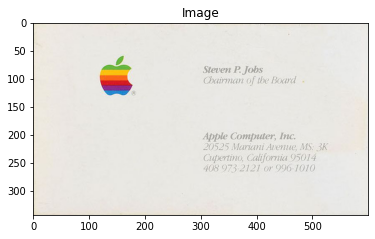

In [31]:
# load the image and display it
image = cv2.imread(args["image"])
plt_imshow("Image", image)

# convert the image to grayscale and blur it slightly
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

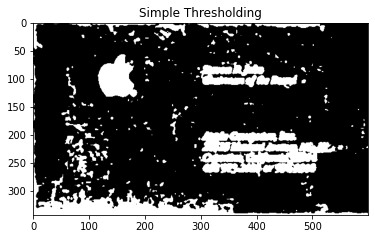

In [32]:
# apply simple thresholding with a hardcoded threshold value
(T, threshInv) = cv2.threshold(blurred, 230, 255,
    cv2.THRESH_BINARY_INV)
plt_imshow("Simple Thresholding", threshInv)

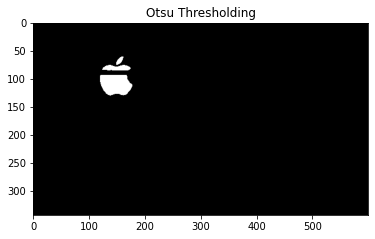

In [33]:
# apply Otsu's automatic thresholding
(T, threshInv) = cv2.threshold(blurred, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt_imshow("Otsu Thresholding", threshInv)

- The above 2 methods are global thresholding techniques, implying that the same value of T is used to test all pixels in the input image, thereby segmenting them into foreground and background.
- The problem here is that having just one value of T may not suffice. Due to variations in lighting conditions, shadowing, etc., it may be that one value of T will work for a certain part of the input image but will utterly fail on a different segment.
- Instead of immediately throwing our hands and claiming that traditional computer vision and image processing will not work for this problem (and thereby immediately jumping to training a deep neural segmentation network like Mask R-CNN or U-Net), we can instead leverage adaptive thresholding.
- The general assumption that underlies all adaptive and local thresholding methods is that smaller regions of an image are more likely to have approximately uniform illumination.
- The general formula to compute T is thus:
                      T = mean(IL ) – C
   where the mean is either the arithmetic or Gaussian mean, IL is the local sub-region of the image, I, and C is some constant which we can use to fine tune the threshold value T.
- The adaptiveMethod decides how the threshold value is calculated:
    - cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
    - cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.
    - The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.

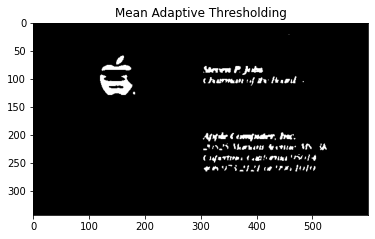

In [34]:
# instead of manually specifying the threshold value, we can use
# adaptive thresholding to examine neighborhoods of pixels and
# adaptively threshold each neighborhood
thresh = cv2.adaptiveThreshold(blurred, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)
plt_imshow("Mean Adaptive Thresholding", thresh)

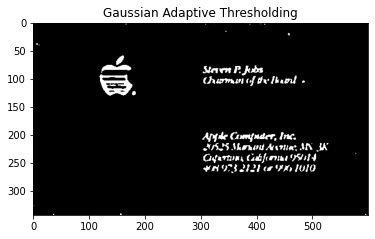

In [35]:
# perform adaptive thresholding again, this time using a Gaussian
# weighting versus a simple mean to compute our local threshold
# value
thresh = cv2.adaptiveThreshold(blurred, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)
plt_imshow("Gaussian Adaptive Thresholding", thresh)

##  5 - Convolutions with openCV

[Reference](https://pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/?_ga=2.72360852.608670271.1656952021-258974203.1656952021)

- Ever apply blurring or smoothing? Yep, that’s a convolution.
  What about edge detection? Yup, convolution.
  Have you opened Photoshop or GIMP to sharpen an image? You guessed it — convolution.
  Convolutions are one of the most critical, fundamental building-blocks in computer vision and image processing. But the term itself tends to scare people off — in fact, on the the surface, the word even appears to have a negative connotation.
- we can think of an image as a big matrix and kernel or convolutional matrix as a tiny matrix that is used for blurring, sharpening, edge detection, and other image processing functions.
- Essentially, this tiny kernel sits on top of the big image and slides from left-to-right and top-to-bottom, applying a mathematical operation (i.e., a convolution) at each (x, y)-coordinate of the original image.
- It’s normal to hand-define kernels to obtain various image processing functions. In fact, you might already be familiar with blurring (average smoothing, Gaussian smoothing, median smoothing, etc.), edge detection (Laplacian, Sobel, Scharr, Prewitt, etc.), and sharpening — all of these operations are forms of hand-defined kernels that are specifically designed to perform a particular function.


#### Kernels
- let’s think of an image as a big matrix and a kernel as tiny matrix (at least in respect to the original “big matrix” image)
-  we are sliding the kernel from left-to-right and top-to-bottom along the original image. At each (x, y)-coordinate of the original image, we stop and examine the neighborhood of pixels located at the center of the image kernel. 
- We then take this neighborhood of pixels, convolve them with the kernel, and obtain a single output value. This output value is then stored in the output image at the same (x, y)-coordinates as the center of the kernel.
- Kernels can be an arbitrary size of M x N pixels, provided that both M and N are odd integers.
              Note: Most kernels you’ll typically see are actually square N x N matrices.

#### Image Convolutions
- In image processing, a convolution requires three components:
     - An input image.
     - A kernel matrix that we are going to apply to the input image.
     - An output image to store the output of the input image convolved with the kernel.
- Convolution itself is actually very easy. All we need to do is:
     1. Select an (x, y)-coordinate from the original image.
     2. Place the center of the kernel at this (x, y)-coordinate.
     3. Take the element-wise multiplication of the input image region and the kernel, then sum up the values of these multiplication operations into a single value. The sum of these multiplications is called the kernel output.
     4. Use the same (x, y)-coordinates from Step #1, but this time, store the kernel output in the same (x, y)-location as the output image.
- The convolution output has decrease in spatial dimension is simply a side effect of applying convolutions to images. Sometimes this effect is desirable and other times its not, it simply depends on your application.
- In most cases, we want our output image to have the same dimensions as our input image. To ensure this, we apply padding. Here we are simply replicating the pixels along the border of the image, such that the output image will match the dimensions of the input image.
      - Other padding methods exist, including zero padding (filling the borders with zeros — very common when building Convolutional Neural Networks) and wrap around (where the border pixels are determined by examining the opposite end of the image). In most cases, you’ll see either replicate or zero padding.





By applying convolutional filters, nonlinear activation functions, pooling, and backpropagation, CNNs are able to learn filters that can detect edges and blob-like structures in lower-level layers of the network — and then use the edges and structures as building blocks, eventually detecting higher-level objects (i.e., faces, cats, dogs, cups, etc.) in the deeper layers of the network.

In [36]:
def convolve(image, kernel):
    # grab the spatial dimensions of the image, along with
    # the spatial dimensions of the kernel
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]

    # allocate memory for the output image, taking care to
    # "pad" the borders of the input image so the spatial
    # size (i.e., width and height) are not reduced
    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
        cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")

    # loop over the input image, "sliding" the kernel across
    # each (x, y)-coordinate from left-to-right and top to
    # bottom
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            # extract the ROI of the image by extracting the
            # *center* region of the current (x, y)-coordinates
            # dimensions
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

            # perform the actual convolution by taking the
            # element-wise multiplicate between the ROI and
            # the kernel, then summing the matrix
            k = (roi * kernel).sum()

            # store the convolved value in the output (x,y)-
            # coordinate of the output image
            output[y - pad, x - pad] = k

    # rescale the output image to be in the range [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")

    # return the output image
    return output

In [37]:
args = {
    "image": "images/3d_pokemon.png"
}

In [38]:
# construct average blurring kernels used to smooth an image
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

# construct a sharpening filter
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

In [39]:
# construct the Laplacian kernel used to detect edge-like
# regions of an image
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")

# construct the Sobel x-axis kernel
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")

# construct the Sobel y-axis kernel
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

In [40]:
# construct the kernel bank, a list of kernels we're going
# to apply using both our custom `convole` function and
# OpenCV's `filter2D` function
kernelBank = (
    ("small_blur", smallBlur),
    ("large_blur", largeBlur),
    ("sharpen", sharpen),
    ("laplacian", laplacian),
    ("sobel_x", sobelX),
    ("sobel_y", sobelY)
)

[INFO] applying small_blur kernel


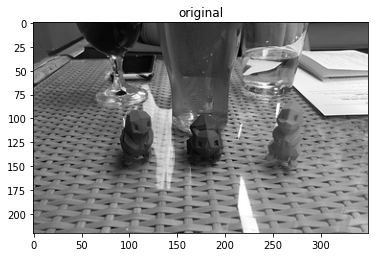

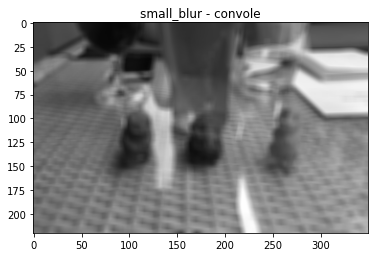

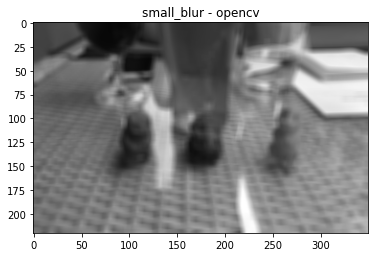

[INFO] applying large_blur kernel


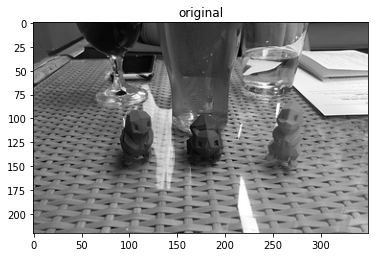

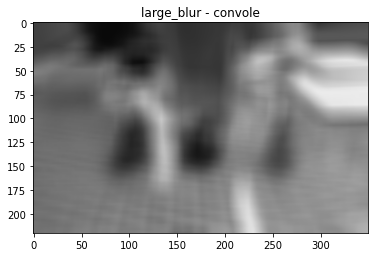

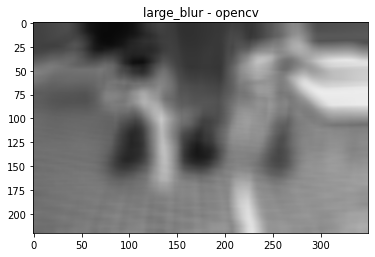

[INFO] applying sharpen kernel


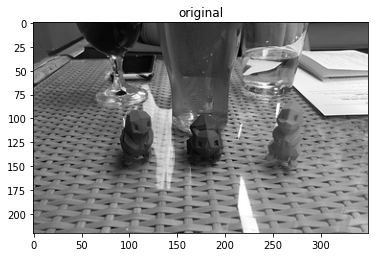

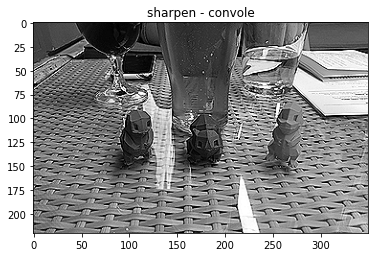

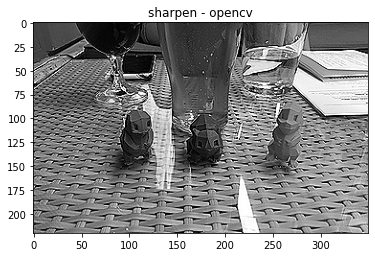

[INFO] applying laplacian kernel


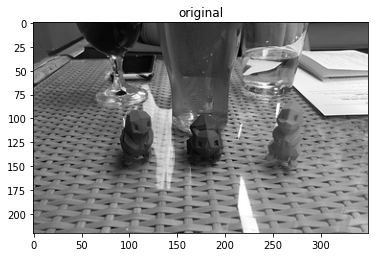

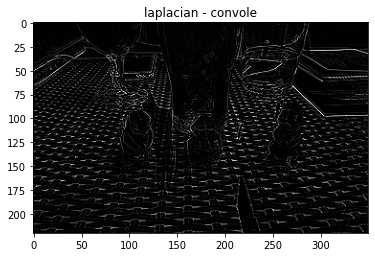

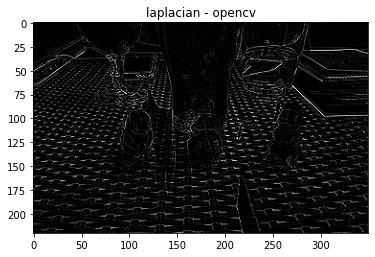

[INFO] applying sobel_x kernel


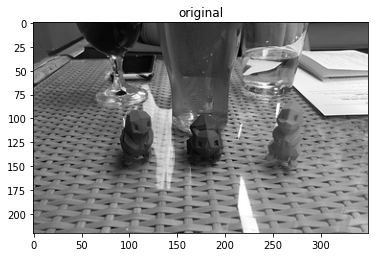

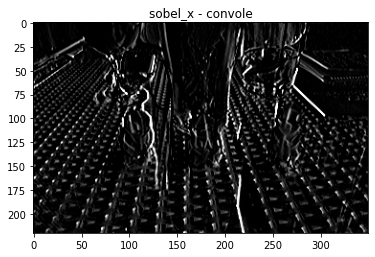

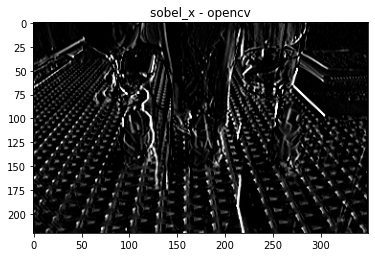

[INFO] applying sobel_y kernel


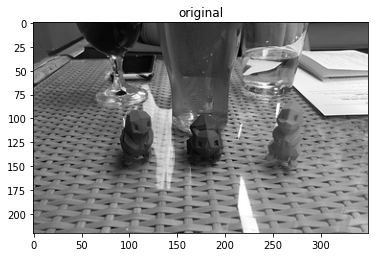

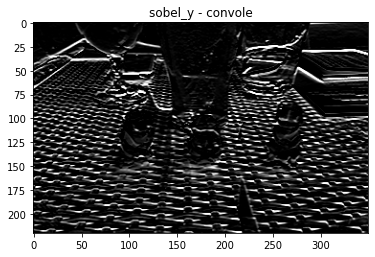

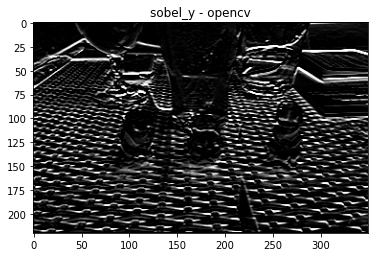

In [41]:
# load the input image and convert it to grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# loop over the kernels
for (kernelName, kernel) in kernelBank:
    # apply the kernel to the grayscale image using both
    # our custom `convole` function and OpenCV's `filter2D`
    # function
    print("[INFO] applying {} kernel".format(kernelName))
    convoleOutput = convolve(gray, kernel)
    opencvOutput = cv2.filter2D(gray, -1, kernel)

    # show the output images
    plt_imshow("original", gray)
    plt_imshow("{} - convole".format(kernelName), convoleOutput)
    plt_imshow("{} - opencv".format(kernelName), opencvOutput)

##  6 - OpenCV (Sobel and Scharr)

[Reference](https://pyimagesearch.com/2021/05/12/image-gradients-with-opencv-sobel-and-scharr/?_ga=2.72360852.608670271.1656952021-258974203.1656952021)

Image gradients are a fundamental building block of many computer vision and image processing routines.
- We use gradients for detecting edges in images, which allows us to find contours and outlines of objects in images
- We use them as inputs for quantifying images through feature extraction — in fact, highly successful and well-known image descriptors such as Histogram of Oriented Gradients and SIFT are built upon image gradient representations
- Gradient images are even used to construct saliency maps, which highlight the subjects of an image

Using this outline, we could then apply contours to extract the actual objects from the region or quantify the shapes so we can identify them later. Just as image gradients are building blocks for methods like edge detection, edge detection is also a building block for developing a complete computer vision application.
- **An image gradient is defined as a directional change in image intensity.**
- The gradient magnitude is used to measure how strong the change in image intensity is. The gradient magnitude is a real-valued number that quantifies the “strength” of the change in intensity.
- The gradient orientation is used to determine in which direction the change in intensity is pointing.

Sobel method uses two kernels: one for detecting horizontal changes in direction and the other for detecting vertical changes in direction.

G_{x} = \begin{bmatrix}-1 & 0 & +1 \\  -2 & 0 & +2 \\  -1 & 0 & +1\end{bmatrix}   G_{y} = \begin{bmatrix}-1 & -2 & -1 \\  0 & 0 & 0 \\  +1 & +2 & +1\end{bmatrix}
Scharr kernel may give us better approximations to the gradient than Sobel:

G_{x} = \begin{bmatrix}+3 & 0 & -3 \\  +10 & 0 & -10 \\  +3 & 0 & -3\end{bmatrix}  
G_{y} = \begin{bmatrix}+3 & +10 & +3 \\  0 & 0 & 0 \\  -3 & -10 & -3\end{bmatrix}

The exact reasons as to why the Scharr kernel could lead to better approximations are heavily rooted in mathematical details.

In [42]:
args = {
    "image": "images/coins01.png",
    "scharr": 0
}

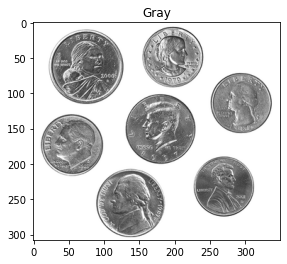

In [43]:
# load the image, convert it to grayscale, and display the original
# grayscale image
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Gray", gray)

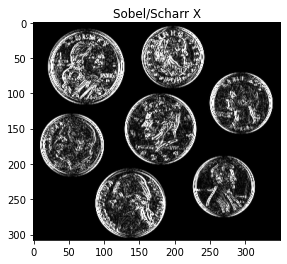

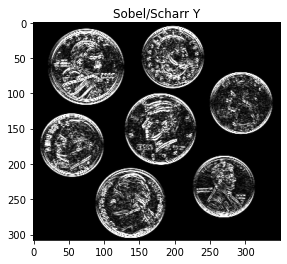

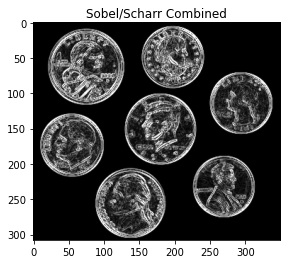

In [44]:
# set the kernel size, depending on whether we are using the Sobel
# operator of the Scharr operator, then compute the gradients along
# the x and y axis, respectively
ksize = -1 if args["scharr"] > 0 else 3
gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)

# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

# combine the gradient representations into a single image
combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

# show our output images
plt_imshow("Sobel/Scharr X", gX)
plt_imshow("Sobel/Scharr Y", gY)
plt_imshow("Sobel/Scharr Combined", combined)

#### Computing gradients using opencv

In [45]:
# load the input image and convert it to grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# compute gradients along the x and y axis, respectively
gX = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
gY = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

# compute the gradient magnitude and orientation
magnitude = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

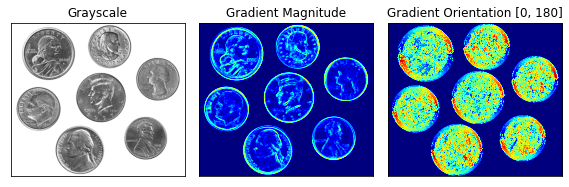

In [46]:
# initialize a figure to display the input grayscale image along with
# the gradient magnitude and orientation representations, respectively
(fig, axs) = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))

# plot each of the images
axs[0].imshow(gray, cmap="gray")
axs[1].imshow(magnitude, cmap="jet")
axs[2].imshow(orientation, cmap="jet")

# set the titles of each axes
axs[0].set_title("Grayscale")
axs[1].set_title("Gradient Magnitude")
axs[2].set_title("Gradient Orientation [0, 180]")

# loop over each of the axes and turn off the x and y ticks
for i in range(0, 3):
    axs[i].get_xaxis().set_ticks([])
    axs[i].get_yaxis().set_ticks([])

# show the plots
plt.tight_layout()
plt.show()

##  7 - Edge Detection

[Reference](https://pyimagesearch.com/2021/05/12/opencv-edge-detection-cv2-canny?_ga=2.117826702.608670271.1656952021-258974203.1656952021)
- The Canny edge detector is arguably the most well known and the most used edge detector in all of computer vision and image processing.
- For the process of edge detection, the gradient magnitude is extremely sensitive to noise.

#### Step edge
A step edge forms when there is an abrupt change in pixel intensity from one side of the discontinuity to the other. 
These types of edges tend to be easy to detect.

#### Ramp edge
A ramp edge is like a step edge, only the change in pixel intensity is not instantaneous. Instead, the change in pixel value occurs a short, but finite distance.

#### Ridge edge
- A ridge edge is similar to combining two ramp edges, one bumped right against another. Can think of ramp edges as driving up and down a large hill or mountain.
- In the context of edge detection, a ramp edge occurs when image intensity abruptly changes, but then returns to the initial value after a short distance.

#### Roof edge
Lastly we have the roof edge

### Canny edge detection in a nutshell
1. Applying Gaussian smoothing to the image to help reduce noise
  - smoothing an image allows us to ignore much of the detail and instead focus on the actual structure
2. Computing the G_{x} and G_{y} image gradients using the Sobel kernel
  -  the gradient magnitude is quite susceptible to noise and does not make for the best edge detector. We need to add two more steps on to the process to extract better edges.
3. Applying non-maxima suppression to keep only the local maxima of gradient magnitude pixels that are pointing in the direction of the gradient.
  - After computing our gradient magnitude representation, the edges themselves are still quite noisy and blurred, but in reality there should only be one edge response for a given region, not a whole clump of pixels reporting themselves as edges. To remedy this, we can apply edge thinning using non-maxima suppression.
4. Defining and applying the T_upper and T_lower thresholds for Hysteresis thresholding
  - Even after applying non-maxima suppression, we may need to remove regions of an image that are not technically edges, but still respond as edges after computing the gradient magnitude and applying non-maximum suppression.
 - To ignore these regions of an image, we need to define two thresholds: T_upper and T_lower.
        - Any gradient value G > T_upper is sure to be an edge.
        - Any gradient value G < T_lower is definitely not an edge, so immediately discard these regions.
        - And any gradient value that falls into the range T_lower < G < T_upper needs to undergo additional tests:
           - If the particular gradient value is connected to a strong edge (i.e., G > T_upper), then mark the pixel as an edge.
           - If the gradient pixel is not connected to a strong edge, then discard it.

While Canny edge detection can be applied to an RGB image by detecting edges in each of the separate Red, Green, and Blue channels separately and combining the results back together, we almost always want to apply edge detection to a single channel, grayscale image — this ensures that there will be less noise during the edge detection process.

while the Canny edge detector does apply blurring prior to edge detection, we’ll also want to (normally) apply extra blurring prior to the edge detector to further reduce noise and allow us to find the objects in an image 

In [47]:
args = {
    "image": "images/coins.png"
}

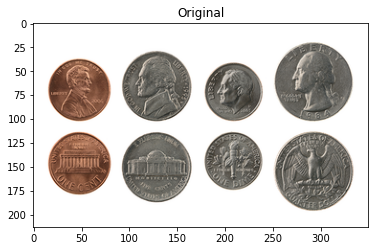

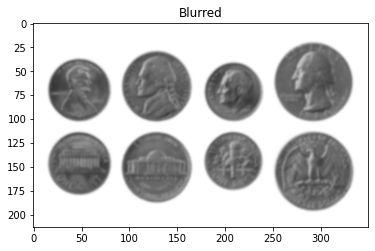

In [48]:
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# show the original and blurred images
plt_imshow("Original", image)
plt_imshow("Blurred", blurred)

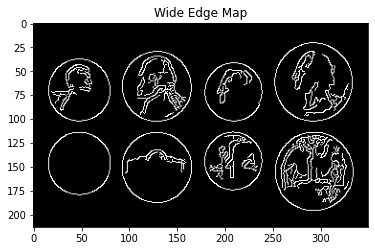

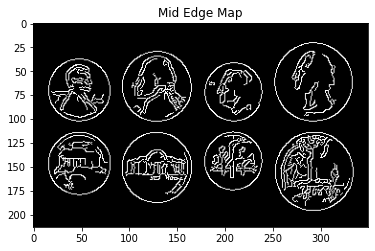

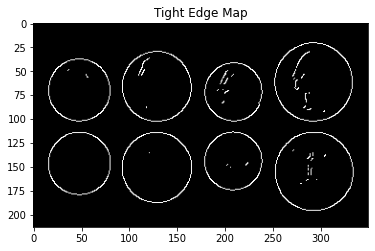

In [49]:
# compute a "wide", "mid-range", and "tight" threshold for the edges
# using the Canny edge detector
wide = cv2.Canny(blurred, 10, 200)
mid = cv2.Canny(blurred, 30, 150)
tight = cv2.Canny(blurred, 240, 250)

# show the output Canny edge maps
plt_imshow("Wide Edge Map", wide)
plt_imshow("Mid Edge Map", mid)
plt_imshow("Tight Edge Map", tight)

##  8 - Automatic Edge Detection 

[Reference](https://pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/?_ga=2.117826702.608670271.1656952021-258974203.1656952021)

- A lower value of sigma indicates a tighter threshold, whereas a larger value of sigma gives a wider threshold. In general, you will not have to change this sigma value often. Simply select a single, default sigma value and apply it to your entire dataset of images.
- Note: In practice, sigma=0.33 tends to give good results on most of the datasets.



In [50]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

In [51]:
args = {
    "images": "images"
}

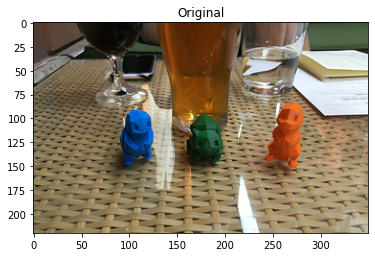

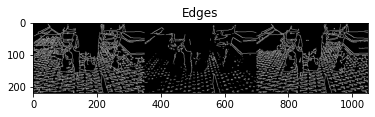

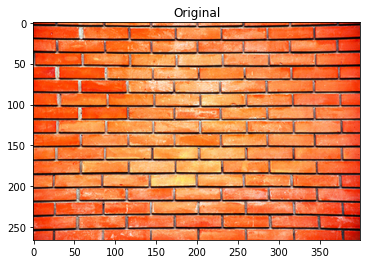

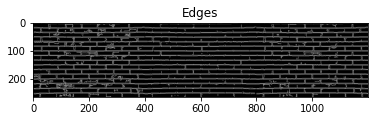

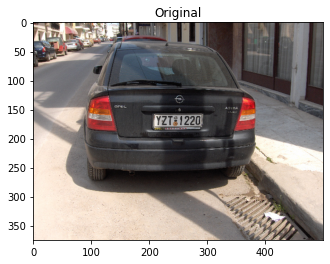

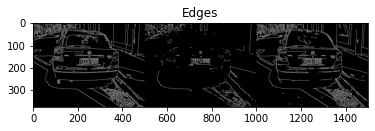

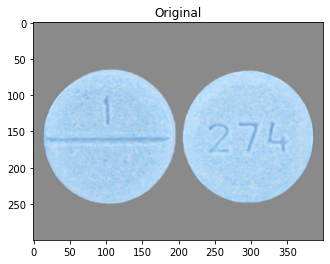

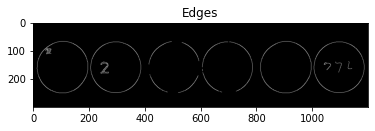

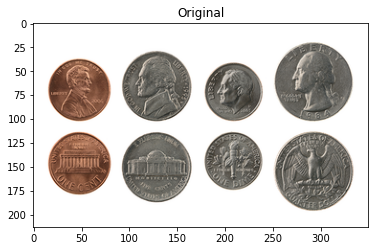

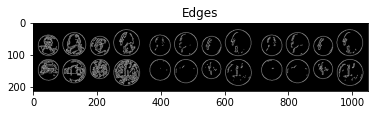

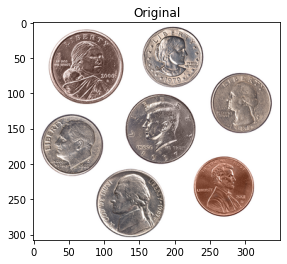

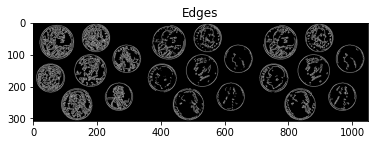

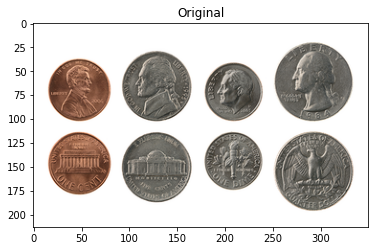

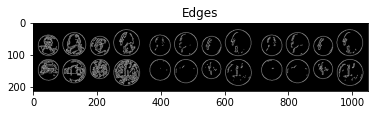

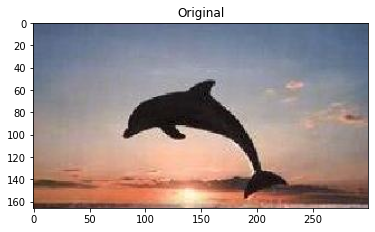

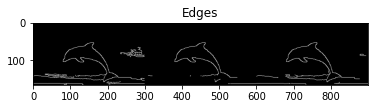

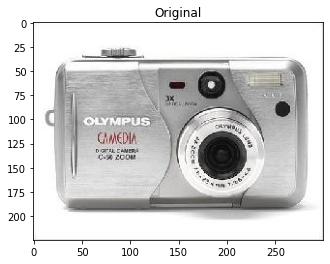

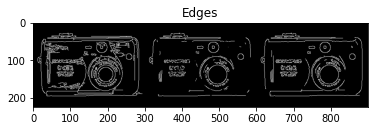

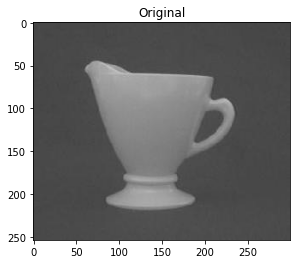

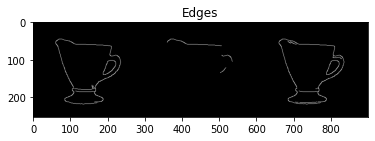

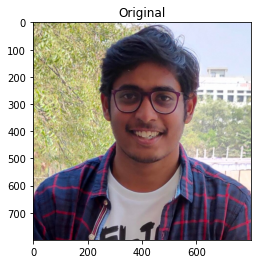

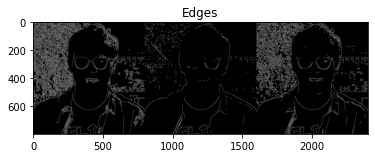

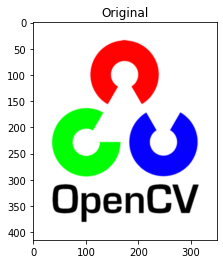

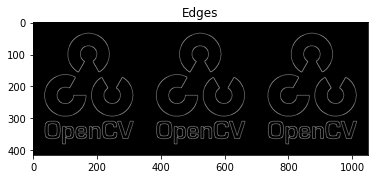

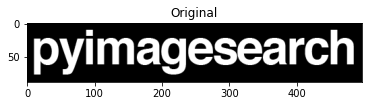

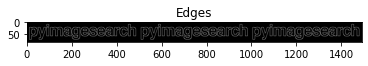

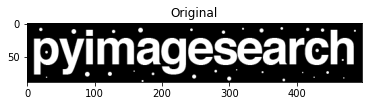

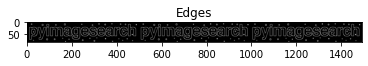

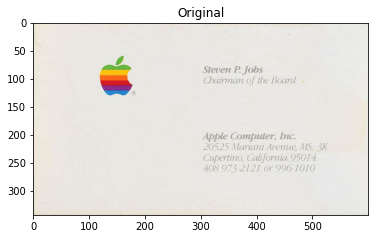

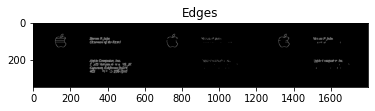

In [52]:
# loop over the images
for imagePath in glob.glob(args["images"] + "/*.*g"):
    # load the image, convert it to grayscale, and blur it slightly
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    # apply Canny edge detection using a wide threshold, tight
    # threshold, and automatically determined threshold
    wide = cv2.Canny(blurred, 10, 200)
    tight = cv2.Canny(blurred, 225, 250)
    auto = auto_canny(blurred)

    # show the images
    plt_imshow("Original", image)
    plt_imshow("Edges", np.hstack([wide, tight, auto]))